# And Data Scient Test


The aim of this test is to test different abilities in the management of data and creation of Machine Learning models. Thus, the data presented includes information on a different working shifts in a production plant. Also, personal information from each worker is presented. You'll work throughout this test with the excel file "testData.xlsx".

### Exploratory data analysis

During this section, you'll need to address different questions using mostly pandas and numpy to address the following questions (Feel free to use also visualization tools such as matplotlib, seaborn or plotly):

1. Join the two datasets to build a new pandas dataframe called "database". This one will be used to create a machine learning model.
2. Which employee has more absences? (Do it in pandas and show in a string which would be the SQL syntax)
3. Are there any correlated columns among the "database" data frame?
4. Determine which are the top ten reasons and transportation methods for absence at work. (Do it in pandas and show in a string which would be the SQL syntax)
5. Create two KPIs that can be a clear target in assessing absences in the company (feel free to create plots using any plotting library)

### Machine learning

In this section, the client asked you to determine which is the probability of absence of any given worker. For this, you'll split your dataset into training and testing objects using the seed 22. Answer the following questions using the sklearn, pandas and numpy packages.

5. Create a function to extract the dummy variables from the "database" data frame.
6. Create a function that splits the dataset into train and test using seed 22.
7. Which variables would you use to determine the probability of absence from a worker?
8. Using sklearn, create a model that predicts the *probability* of absence of any given worker. Describe why did you choose that model (Include metrics and plots to support your answer).
9. Are there any variables that you'd like to add?

In [7]:
# import pandas as pd
# import numpy as np
# from sklearn           ----> Cuidado, es import sklearn, y no from 

In [8]:
# employee = pd.read_excel('testData.xlsx', sheet_name= 'employee')
# workday = pd.read_excel('testData.xlsx', sheet_name= 'workday')

# Part 0 : Import libreries + set de work directory

In [9]:
# Libraries

import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn


In [10]:
# Set de workin directory

path = 'C:\\Users\\oscar\\Desktop\\GitHub\\Python\\Jupyter Notebook\\Test_TEAM'

# Change the current working directory
os.chdir(path)

# Let's check the new directory 

print("Current working directory: {0}".format(os.getcwd()))

Current working directory: c:\Users\oscar\Desktop\GitHub\Python\Jupyter Notebook\Test_TEAM


In [11]:
# Import data

employee = pd.read_excel('testData.xlsx', sheet_name= 'employee')
workday = pd.read_excel('testData.xlsx', sheet_name= 'workday')

In [12]:
# Some verifications from the Dataframes

employee.shape

(37, 10)

In [13]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            37 non-null     int64 
 1   transport_expense      37 non-null     int64 
 2   distance               37 non-null     int64 
 3   age                    37 non-null     int64 
 4   education              37 non-null     int64 
 5   sons                   37 non-null     int64 
 6   pet                    37 non-null     int64 
 7   gender                 37 non-null     object
 8   disciplinary_faults    37 non-null     int64 
 9   transportation_method  37 non-null     object
dtypes: int64(8), object(2)
memory usage: 3.0+ KB


In [14]:
workday.shape

(2160, 9)

In [15]:
workday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   employee_id              2160 non-null   int64         
 1   date                     2160 non-null   datetime64[ns]
 2   group_cause              2160 non-null   object        
 3   month                    2160 non-null   int64         
 4   day_of_week              2160 non-null   int64         
 5   absent                   2160 non-null   int64         
 6   days_since_last_absence  2160 non-null   int64         
 7   weather                  2160 non-null   float64       
 8   holiday                  2160 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 152.0+ KB


# Part I: Exploratoty Data Analysis

### 1. Join the two datasets to build a new pandas dataframe called "database". This one will be used to create a machine learning model.

In [16]:
database = pd.merge(employee,workday,on= 'employee_id', how='right')
# database.head(40)
database.shape


(2220, 18)

In [17]:
database.head(5)

,employee_id,transport_expense,distance,age,education,sons,pet,gender,disciplinary_faults,transportation_method,date,group_cause,month,day_of_week,absent,days_since_last_absence,weather,holiday
0,1,235,11,37,3,1,1,F,3,public_transportation,2021-01-01,None,1,5,0,0,4.1,1
1,2,235,29,48,1,1,5,M,4,public_transportation,2021-01-01,Group_2,1,5,1,20,4.1,1
2,3,179,51,38,1,0,0,M,5,bicycle,2021-01-01,None,1,5,0,12,4.1,1
3,4,118,14,40,1,1,8,F,0,public_transportation,2021-01-01,None,1,5,0,15,4.1,1
4,5,235,20,43,1,1,0,M,1,bicycle,2021-01-01,None,1,5,0,19,4.1,1


### 2. Which employee has more absences? (Do it in pandas and show in a string which would be the SQL syntax)

In [18]:
absences = database.groupby(['employee_id']).absent.sum()
absences 

minimun_abseence  = absences.to_frame(name="Ausencias")
minimun_abseence = minimun_abseence.sort_values(by='Ausencias')
minimun_abseence

Id_menos_ausencias = minimun_abseence.query('Ausencias == 0')
Id_menos_ausencias





,Ausencias
employee_id,
25,0


In [19]:
# o mediante esta forma

Id_menos_ausencias_2 = minimun_abseence[minimun_abseence["Ausencias"]== 0]
Id_menos_ausencias_2


,Ausencias
employee_id,
25,0


### 3. Are there any correlated columns among the "database" data frame?

In [20]:
# 1. Una matriz de correlación

corr_matrix = database.corr().round(2)
corr_matrix

C:\Users\oscar\AppData\Local\Temp\ipykernel_14076\2930240599.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = database.corr().round(2)


,employee_id,transport_expense,distance,age,education,sons,pet,disciplinary_faults,month,day_of_week,absent,days_since_last_absence,weather,holiday
employee_id,1.00,-0.00,0.06,0.03,0.05,-0.24,-0.28,-0.06,-0.00,0.00,0.05,-0.03,-0.00,0.00
transport_expense,-0.00,1.00,0.16,-0.08,-0.09,0.24,-0.04,0.03,0.00,-0.00,0.06,-0.07,0.00,-0.01
distance,0.06,0.16,1.00,-0.12,-0.27,0.01,0.29,0.19,0.00,-0.00,0.17,-0.22,0.00,-0.00
age,0.03,-0.08,-0.12,1.00,-0.17,0.13,0.01,0.13,-0.00,0.00,-0.04,-0.06,-0.00,0.00
education,0.05,-0.09,-0.27,-0.17,1.00,-0.13,-0.02,-0.33,-0.00,0.00,-0.12,0.30,-0.00,-0.00
sons,-0.24,0.24,0.01,0.13,-0.13,1.00,0.07,0.31,0.00,-0.00,0.07,-0.18,0.00,-0.00
pet,-0.28,-0.04,0.29,0.01,-0.02,0.07,1.00,-0.16,-0.00,0.00,0.00,-0.01,-0.00,0.00
disciplinary_faults,-0.06,0.03,0.19,0.13,-0.33,0.31,-0.16,1.00,-0.00,-0.00,0.10,-0.24,-0.00,-0.00
month,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,1.00,-0.12,-0.04,0.10,0.14,0.00
day_of_week,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.12,1.00,0.01,0.02,-0.21,-0.20


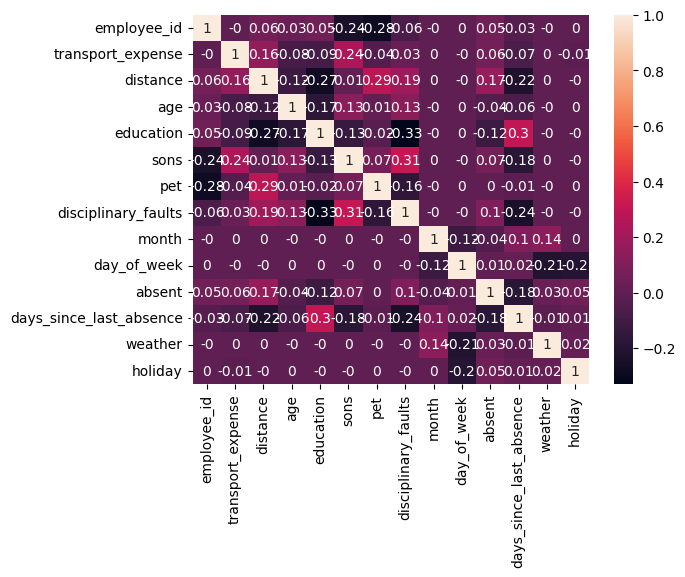

In [21]:
# Un heatmap

sn.heatmap(corr_matrix, annot=True)
plt.show()

Realmebte no se observan fuertes correlaciones entre los variables. 

### 4. Determine which are the top ten reasons and transportation methods for absence at work. (Do it in pandas and show in a string which would be the SQL syntax)

In [22]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2220 entries, 0 to 2219
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   employee_id              2220 non-null   int64         
 1   transport_expense        2220 non-null   int64         
 2   distance                 2220 non-null   int64         
 3   age                      2220 non-null   int64         
 4   education                2220 non-null   int64         
 5   sons                     2220 non-null   int64         
 6   pet                      2220 non-null   int64         
 7   gender                   2220 non-null   object        
 8   disciplinary_faults      2220 non-null   int64         
 9   transportation_method    2220 non-null   object        
 10  date                     2220 non-null   datetime64[ns]
 11  group_cause              2220 non-null   object        
 12  month                    2220 non-

In [23]:
database.head(3)

,employee_id,transport_expense,distance,age,education,sons,pet,gender,disciplinary_faults,transportation_method,date,group_cause,month,day_of_week,absent,days_since_last_absence,weather,holiday
0,1,235,11,37,3,1,1,F,3,public_transportation,2021-01-01,None,1,5,0,0,4.1,1
1,2,235,29,48,1,1,5,M,4,public_transportation,2021-01-01,Group_2,1,5,1,20,4.1,1
2,3,179,51,38,1,0,0,M,5,bicycle,2021-01-01,None,1,5,0,12,4.1,1


In [24]:
top_10_reasons = database.groupby(['transportation_method']).absent.sum().to_frame(name="Transport absent")
top_10_reasons = top_10_reasons.sort_values(by=['Transport absent'], ascending=False)
top_10_reasons
# database.groupby(['employee_id']).absent.sum()

,Transport absent
transportation_method,
public_transportation,250
bicycle,75
bike,38
walking,33
car,25


La distancia podría ser también.

In [25]:
top_distance = database.groupby(['distance']).absent.sum().to_frame(name="Transport absent")
top_distance = top_distance.sort_values(by=['Transport absent'], ascending=False)
top_distance



,Transport absent
distance,
26,53
50,40
29,34
27,33
31,30
49,24
36,24
48,23
15,20


Realmente habría que hacer un análisis de ML para determinar los factores que producen el ausentismo en el trabajo.

###  5. Create two KPIs that can be a clear target in assessing absences in the company (feel free to create plots using any plotting library)

In [26]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2220 entries, 0 to 2219
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   employee_id              2220 non-null   int64         
 1   transport_expense        2220 non-null   int64         
 2   distance                 2220 non-null   int64         
 3   age                      2220 non-null   int64         
 4   education                2220 non-null   int64         
 5   sons                     2220 non-null   int64         
 6   pet                      2220 non-null   int64         
 7   gender                   2220 non-null   object        
 8   disciplinary_faults      2220 non-null   int64         
 9   transportation_method    2220 non-null   object        
 10  date                     2220 non-null   datetime64[ns]
 11  group_cause              2220 non-null   object        
 12  month                    2220 non-

In [27]:
database_ausen = database[database["absent"].isin([1])]
database_ausen.head(10)

,employee_id,transport_expense,distance,age,education,sons,pet,gender,disciplinary_faults,transportation_method,date,group_cause,month,day_of_week,absent,days_since_last_absence,weather,holiday
1,2,235,29,48,1,1,5,M,4,public_transportation,2021-01-01,Group_2,1,5,1,20,4.1,1
5,6,189,29,33,1,2,2,F,1,public_transportation,2021-01-01,Group_2,1,5,1,38,4.1,1
6,7,279,5,39,1,2,0,F,1,public_transportation,2021-01-01,Group_3,1,5,1,0,4.1,1
10,11,289,36,33,1,2,1,M,2,bicycle,2021-01-01,Group_3,1,5,1,26,4.1,1
19,20,260,50,36,1,4,0,F,5,public_transportation,2021-01-01,Group_3,1,5,1,2,4.1,1
30,30,157,27,29,1,0,0,F,3,walking,2021-01-01,Group_1,1,5,1,3,4.1,1
34,34,118,10,37,1,0,0,F,5,bike,2021-01-01,Group_3,1,5,1,26,4.1,1
36,36,118,13,50,1,1,0,F,5,bicycle,2021-01-01,Group_1,1,5,1,1,4.1,1
38,2,235,29,48,1,1,5,M,4,public_transportation,2021-01-02,Group_2,1,6,1,0,8.6,0
47,11,289,36,33,1,2,1,M,2,bicycle,2021-01-02,Group_3,1,6,1,0,8.6,0


Para el clima y la cantida dde hijos, un crosstab con respecto a los absent

In [28]:
# Clima y ausencia --> crosstab 

clim_ause = pd.crosstab(index = database_ausen['weather'], 
                        columns = database_ausen['absent'],
                        normalize=True)*100
clim_ause.round(2)

absent,1
weather,
3.0,1.19
3.7,0.24
4.1,1.90
4.3,3.80
4.6,1.90
4.8,1.90
5.0,2.85
5.1,1.66
5.2,0.71


Entre mayor el clima, más suelen faltar...

In [29]:
# Número de hijos y ausencia

sons_ause = pd.crosstab(index = database_ausen['sons'], 
                        columns = database_ausen['absent'],
                        normalize=True)*100
sons_ause.round(2)

absent,1
sons,
0,30.17
1,24.70
2,35.87
3,4.04
4,5.23


In [30]:
type(sons_ause)

pandas.core.frame.DataFrame

In [31]:
sons_ause.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       5 non-null      float64
dtypes: float64(1)
memory usage: 80.0 bytes


Se podría crear gráficos de barras, o de pastel, y así ver los porcentajes. La temperatura no influye, y entre menos hijos, mayor es la ausencia de hijos. 

# Part II : Machine Learning 

In this section, the client asked you to determine which is the probability of absence of any given worker. For this, you'll split your dataset into training and testing objects using the seed 22. Answer the following questions using the sklearn, pandas and numpy packages.

## 5. Create a function to extract the dummy variables from the "database" data frame.

In [32]:
database.head(5)

,employee_id,transport_expense,distance,age,education,sons,pet,gender,disciplinary_faults,transportation_method,date,group_cause,month,day_of_week,absent,days_since_last_absence,weather,holiday
0,1,235,11,37,3,1,1,F,3,public_transportation,2021-01-01,None,1,5,0,0,4.1,1
1,2,235,29,48,1,1,5,M,4,public_transportation,2021-01-01,Group_2,1,5,1,20,4.1,1
2,3,179,51,38,1,0,0,M,5,bicycle,2021-01-01,None,1,5,0,12,4.1,1
3,4,118,14,40,1,1,8,F,0,public_transportation,2021-01-01,None,1,5,0,15,4.1,1
4,5,235,20,43,1,1,0,M,1,bicycle,2021-01-01,None,1,5,0,19,4.1,1


In [33]:
dummy = pd.get_dummies(database,
                       columns=['absent','holiday'])
dummy

,employee_id,transport_expense,distance,age,education,sons,pet,gender,disciplinary_faults,transportation_method,date,group_cause,month,day_of_week,days_since_last_absence,weather,absent_0,absent_1,holiday_0,holiday_1
0,1,235,11,37,3,1,1,F,3,public_transportation,2021-01-01,None,1,5,0,4.1,1,0,0,1
1,2,235,29,48,1,1,5,M,4,public_transportation,2021-01-01,Group_2,1,5,20,4.1,0,1,0,1
2,3,179,51,38,1,0,0,M,5,bicycle,2021-01-01,None,1,5,12,4.1,1,0,0,1
3,4,118,14,40,1,1,8,F,0,public_transportation,2021-01-01,None,1,5,15,4.1,1,0,0,1
4,5,235,20,43,1,1,0,M,1,bicycle,2021-01-01,None,1,5,19,4.1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,32,289,48,49,1,0,2,F,0,car,2021-03-01,Group_1,3,1,0,9.4,0,1,1,0
2216,33,248,25,47,1,2,1,F,3,bike,2021-03-01,None,3,1,25,9.4,1,0,1,0
2217,34,118,10,37,1,0,0,F,5,bike,2021-03-01,None,3,1,9,9.4,1,0,1,0
2218,35,179,45,53,1,1,1,F,4,public_transportation,2021-03-01,None,3,1,0,9.4,1,0,1,0


## 6. Create a function that splits the dataset into train and test using seed 22. or 80-20 % 

In [34]:
seed = np.random.seed(22)
database.shape

(2220, 18)

In [35]:
train = database.sample(frac=0.8,random_state=200)
test = database.drop(train.index)

train.shape

(1776, 18)

In [36]:
test.shape

(444, 18)

In [37]:
# Otra forma 

from sklearn.model_selection import train_test_split

train, test = train_test_split(database, train_size=0.8, test_size=0.2)

train.shape

(1776, 18)

In [38]:
test.shape

(444, 18)

## 7. Which variables would you use to determine the probability of absence from a worker?

I'd use:

- distance
- age 
- sons
- pet
- disciplinary_faults
- transportation_method
- month
- day_of_week 
- weather

## 8. Using sklearn, create a model that predicts the *probability* of absence of any given worker. Describe why did you choose that model (Include metrics and plots to support your answer).

-  use the predict_proba() command i python 

In [50]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

y_database = database.absent
x_database = database.loc[:, ['distance', 'age', 'sons','pet']]


# X = [ [2,1,1,1], [2,0,2,1], [3,1,1,1] , [3,1,1,1], [3,1,1,1] ]
# y = [ 0, 1, 1, 1, 1 ]

# rf = RandomForestClassifier(n_estimators=200, max_depth=5)
# rf.fit(X, y)

# X_test = [ [2, 0, 1, 0], [2,1,1,1] , [3,1,1,1] ]
# y_result = rf.predict(X_test)


# y_result = rf.predict_proba(X_test)
# y_result

In [48]:
y_database.shape

(2220,)

In [46]:
x_database.shape

(2220, 6)

In [52]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(x_database, y_database)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [53]:
# Let's chose the follow worker

X_test = [ [200, 29, 1, 2]]
y_result = rf.predict(X_test)

C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [54]:
y_result = rf.predict_proba(X_test)
y_result

C:\Users\oscar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.80250253, 0.19749747]])

En este caso, una persona con un distance=200, edad=29, sons=1 y mascotas=2, tiene una proba de ausentarse de 0.19749747

## 9. Are there any variables that you'd like to add?

- Country
- Weight
- Status Marital
- Position in the company